In [ ]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install tbats
!pip install statsmodels

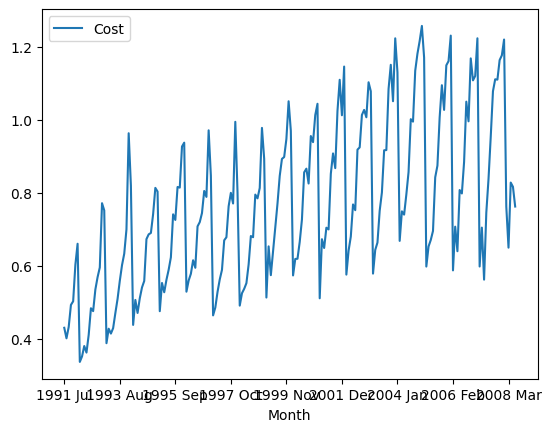

In [ ]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [ ]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


# Using the above data set
1)Test stationary of the
dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

9) Use TBATS model in train data.  Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS  method. in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

10) Which model gives the lowes MAPE score?

In [ ]:
#1 Hypothesis:    H0: The time series is non-stationary. Ha: The time series is stationary.
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ap1["Cost"])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
if adf_result[1] < 0.05:
    print("The time series is stationary. Reject the H0")
else:
    print("The time series is non-stationary. Fail to Reject the H0")


ADF Statistic: -1.6967562070359845
p-value: 0.43278454683042955
The time series is non-stationary. Fail to Reject the H0


In [ ]:
#2 Null hypothesis (H0): The time series is non-stationary. Alternative hypothesis (H1): The time series is stationary
ap1_diff = ap1["Cost"].diff().dropna()
ap1_seasonal_diff = ap1["Cost"].diff(12).dropna()
adf_result_diff = adfuller(ap1_diff)
print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value (Differenced):", adf_result_diff[1])
adf_result_seasonal_diff = adfuller(ap1_seasonal_diff)
print("ADF Statistic (Seasonally Differenced):", adf_result_seasonal_diff[0])
print("p-value (Seasonally Differenced):", adf_result_seasonal_diff[1])
if adf_result_diff[1] < 0.05 and adf_result_seasonal_diff[1] < 0.05:
    print("The time series is stationary. Reject the H0")
else :
    print("The time series is non-stationary. Fail to Reject the H0")

ADF Statistic (Differenced): -3.3659382333938805
p-value (Differenced): 0.012176310540912193
ADF Statistic (Seasonally Differenced): -3.368644444278831
p-value (Seasonally Differenced): 0.012075368713834808
The time series is stationary. Reject the H0


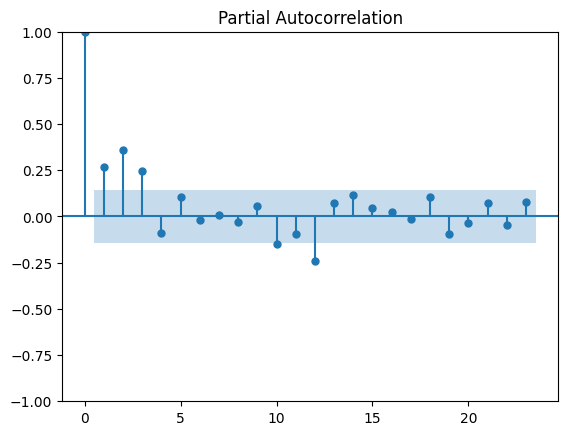

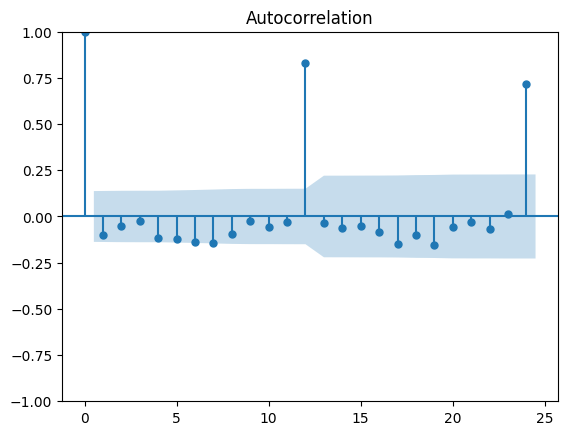

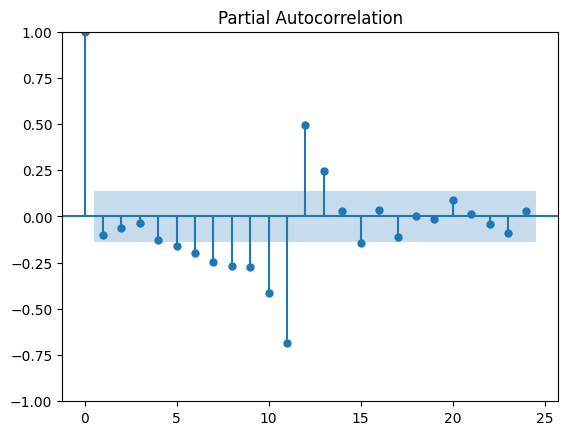

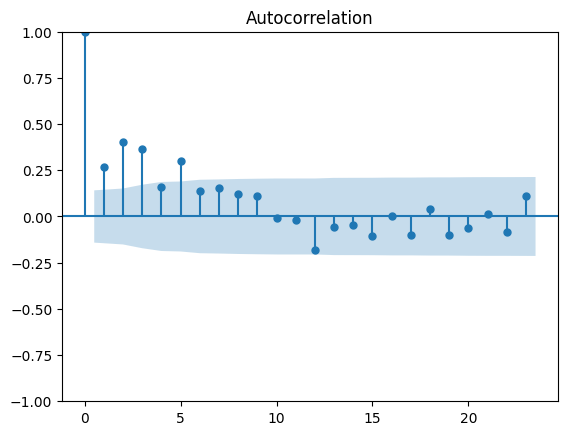

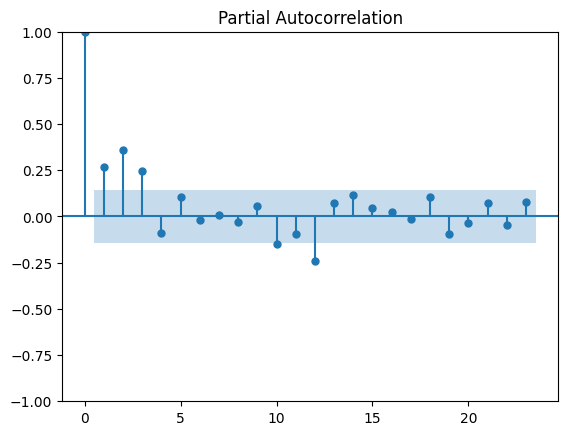

In [ ]:
#3
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ap1_diff)
plot_pacf(ap1_diff)
plot_acf(ap1_seasonal_diff)
plot_pacf(ap1_seasonal_diff)

In [ ]:
#4
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(ap1["Cost"], order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
model2 = SARIMAX(ap1["Cost"], order=(2, 1, 2), seasonal_order=(1, 0, 1, 12))
aic1 = model1.fit().aic
aic2 = model2.fit().aic
print("Model 1 AIC:", aic1)
print("Model 2 AIC:", aic2)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loc

Model 1 AIC: -560.8168983208928
Model 2 AIC: -556.8978304353166


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# The model with the lower AIC score is considered better. Therefore, Model 2 with an AIC score of -556.8978304353166 is better than Model 1 with an AIC score of -560.8168983208928.

In [ ]:
#5
train_data = ap1[:-12]
test_data = ap1[-12:]
train_data

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2007 Feb,0.597753
2007 Mar,0.704398
2007 Apr,0.561760


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loc

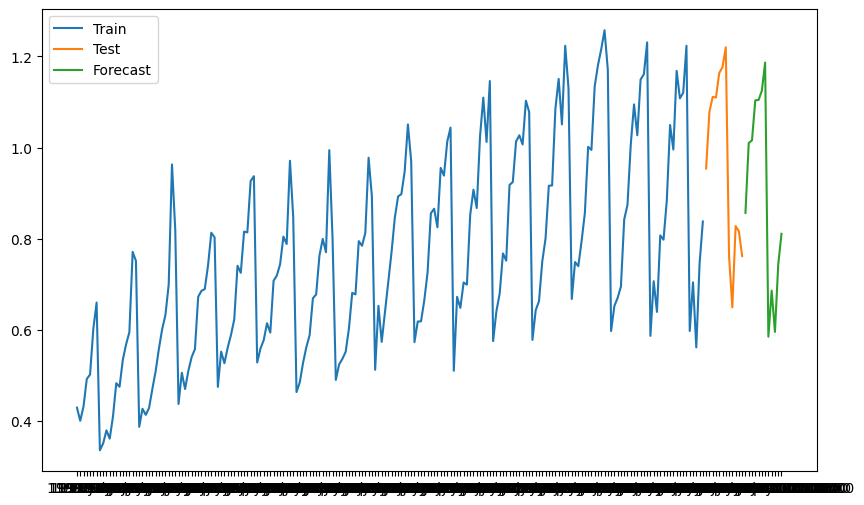

MAE: 0.0815539715271058
MAPE: 0.09176042973883757
MSE: 0.010380926061009302


In [43]:
#6
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn import metrics

model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(1, 0, 1, 12))
results = model.fit()
forecast_horizon = len(test_data)
forecast = results.predict(start=len(train_data), end=len(train_data) + forecast_horizon - 1)
forecast_string = [str(date) for date in forecast.index]
plt.figure(figsize=(10, 6))
plt.plot(train_data, label="Train")
plt.plot(test_data, label="Test")
plt.plot(forecast_string, forecast, label="Forecast")
plt.legend()
plt.show()

mae = metrics.mean_absolute_error(test_data, forecast)
mape = metrics.mean_absolute_percentage_error(test_data, forecast)
mse = metrics.mean_squared_error(test_data, forecast)

print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE: 0.07
MAPE: 7.60%
MSE: 0.01


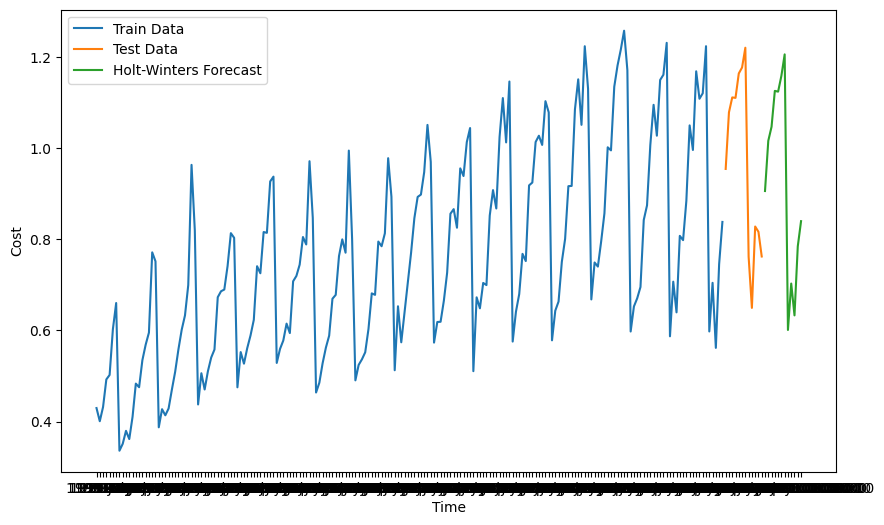

In [67]:
#7 The multiplicative model is used because the seasonal variations are likely to be proportional to the level of the series (i.e., as the overall cost increases, the seasonal fluctuations also increase).
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HoltWinters
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

model = HoltWinters(train_data['Cost'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12).fit()

forecast = model.forecast(len(test_data))
forecast_errors = test_data['Cost'] - forecast
forecast_string = [str(date) for date in forecast.index]
mae = mean_absolute_error(test_data['Cost'], forecast)
mape = mean_absolute_percentage_error(test_data['Cost'], forecast) * 100
mse = mean_squared_error(test_data['Cost'], forecast)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE: {mse:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(train_data['Cost'], label='Train Data')
plt.plot(test_data['Cost'], label='Test Data')
plt.plot(forecast_string, forecast, label='Holt-Winters Forecast')
plt.xlabel('Time')
plt.ylabel('Cost')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 0.0720210629437731
Mean Squared Error = 0.008942035894700913
Root Mean Squared Error = 0.09456233866979451
MAPE: 7.60%


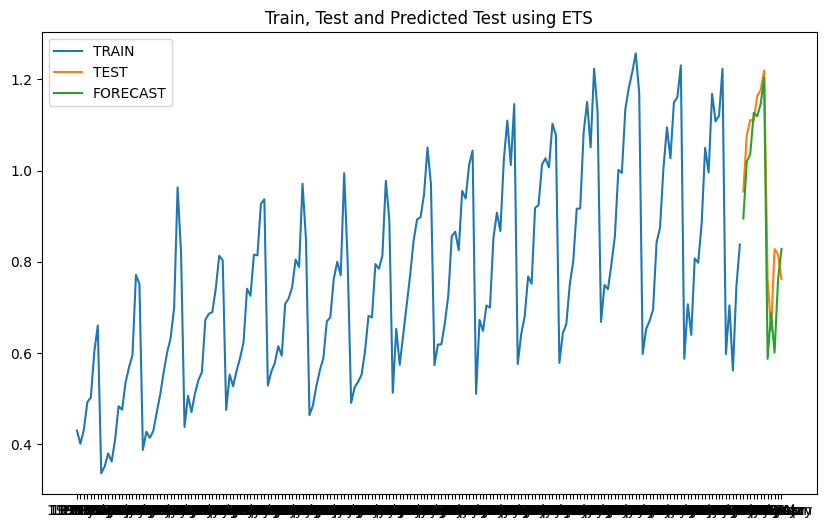

In [60]:
#8
import matplotlib.pyplot as plt
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
train_cost = train_data['Cost']
test_predictions=ETSModel(train_cost,error='add', trend='mul',seasonal='add',damped_trend=True, seasonal_periods=12).fit().forecast(12)
print(f'Mean Absolute Error = {mean_absolute_error(test_data,test_predictions)}')
mse=mean_squared_error(test_data,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
mape = mean_absolute_percentage_error(test_data['Cost'], forecast) * 100
print(f"MAPE: {mape:.2f}%")
forecast = model.forecast(len(test_data))
forecast_errors = test_data['Cost'] - forecast
forecast_string = [str(date) for date in forecast.index]

test_predictions=pd.DataFrame(test_predictions)
new_index = test_data.index
test_predictions=test_predictions.set_index(new_index)
test_predictions.columns=['Cost']
plt.figure(figsize=(10, 6))
plt.plot(train_cost,label='TRAIN')
plt.plot(test_data,label='TEST')
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ETS');

Mean Absolute Error = 0.06513512310328727
Mean Squared Error = 0.007204815209575271
Root Mean Squared Error = 0.08488118289453364
Mean Absolute Percentage Error = 24.53321785954092


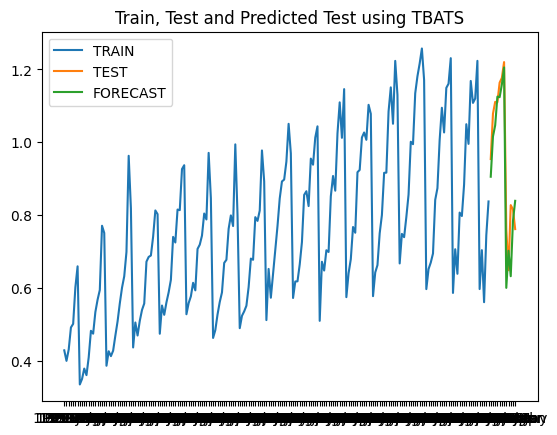

In [72]:
#9
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tbats import TBATS
estimator=TBATS(train_data["Cost"], seasonal_periods=[12], use_arma_errors=True)

test_predictions = model.forecast(steps=12)
print(f'Mean Absolute Error = {mean_absolute_error(test_data,test_predictions)}')
mse=mean_squared_error(test_data,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100
print(f'Mean Absolute Percentage Error = {mape(np.array(test_data),np.array(test_predictions) )}')

test_predictions=pd.DataFrame(test_predictions)
new_index = test_data.index
test_predictions=test_predictions.set_index(new_index)
test_predictions.columns=['SALES']
plt.plot(train_data,label='TRAIN')
plt.plot(test_data,label='TEST')
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS');

In [ ]:
#10
